In [1]:
import pandas as pd

In [12]:
charities = pd.read_csv("../data/charities_active.csv", index_col="org_id")

c:\users\drkan\code\ukcat\env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
desc_len = pd.DataFrame([
    charities["name"],
    charities["activities"].fillna(charities["objects"]).fillna("")
]).T.apply(lambda x: " ".join(x), axis=1).str.len()
desc_len

org_id
GB-CHC-200002    333
GB-CHC-200009    142
GB-CHC-200012    153
GB-CHC-200017    106
GB-CHC-200023    198
                ... 
GB-NIC-108204     18
GB-NIC-108205     17
GB-NIC-108225     28
GB-NIC-108234     22
GB-NIC-108243     21
Length: 201963, dtype: int64

In [14]:
charities_ukcat = pd.read_csv("../data/charities_active-ukcat.csv")
charities_ukcat

,org_id,ukcat_code
0,GB-CHC-1000000,ED
1,GB-CHC-1000000,ED102
2,GB-CHC-1000001,AR
3,GB-CHC-1000001,AR104
4,GB-CHC-1000001,AR201
...,...,...
794678,GB-SC-SC051144,EC101
794679,GB-SC-SC051144,HR
794680,GB-SC-SC051144,HR103
794681,GB-SC-SC051144,LE105


In [18]:
codes_n = charities_ukcat.groupby("org_id").count()["ukcat_code"].rename("n_codes")

In [21]:
len_comparison = desc_len.rename("description length").to_frame().join(codes_n, how="left").fillna(0)

<AxesSubplot:xlabel='description length', ylabel='n_codes'>

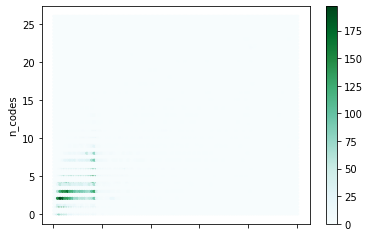

In [28]:
len_comparison.sample(10000).plot.hexbin(x="description length", y="n_codes", reduce_C_function="sum")

<AxesSubplot:xlabel='n_codes'>

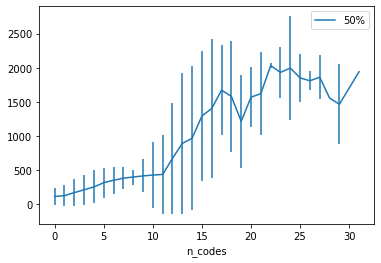

In [45]:
comparison = len_comparison.groupby("n_codes").describe()["description length"]
comparison.loc[:, "iqr"] = comparison["75%"] - comparison["25%"]
comparison.plot.line(y="50%", yerr="iqr")

<AxesSubplot:xlabel='Number of UK-CAT codes per charity', ylabel='Mean length of combined name and activities description'>

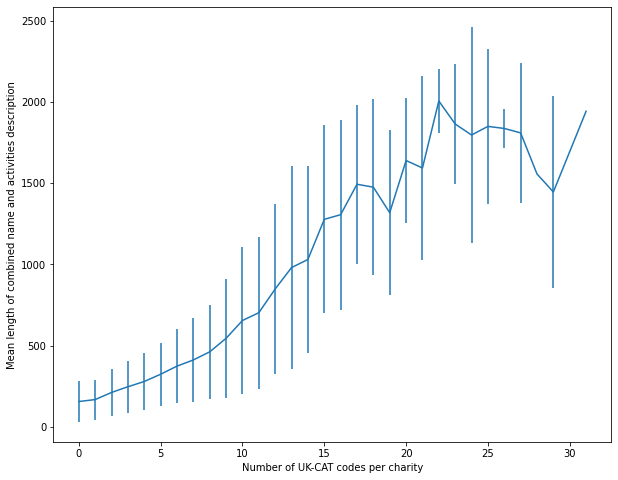

In [51]:
comparison.plot.line(
    y="mean",
    yerr="std",
    figsize=(10,8),
    ylabel="Mean length of combined name and activities description",
    xlabel="Number of UK-CAT codes per charity",
    legend=False,
)

In [52]:
comparison

,count,mean,std,min,25%,50%,75%,max,iqr
n_codes,,,,,,,,,
0.0,7705.0,155.415574,126.331209,6.0,69.00,116.0,199.00,2005.0,130.00
1.0,22409.0,167.280066,122.748604,10.0,77.00,127.0,229.00,1676.0,152.00
2.0,34082.0,211.132152,147.409555,17.0,101.00,172.0,295.00,1999.0,194.00
3.0,37411.0,246.245249,161.391564,21.0,129.00,213.0,350.00,2197.0,221.00
4.0,32587.0,278.595329,177.263735,28.0,145.00,255.0,387.00,2318.0,242.00
5.0,22906.0,323.350607,194.814088,33.0,189.00,317.0,410.00,2319.0,221.00
6.0,16743.0,373.156662,229.538558,44.0,228.00,353.0,423.00,2712.0,195.00
7.0,10350.0,411.200386,260.650370,60.0,268.00,383.0,430.00,2505.0,162.00
8.0,7522.0,461.169370,290.556468,70.0,332.00,400.0,442.00,2359.0,110.00
